# Reinforcement Learning Task
In this task you need to add some extra strategies to the $k$-armed bandit policy experiment. 

## Would You Like to Play A Game?

 A simple demo of main components of reinforcement leaerning through a simple game.

### Initialisation

Import packages used

In [3]:
import numpy as np
import random
import pandas as pd
import seaborn as sns

import operator
from matplotlib import pyplot as plt
%matplotlib inline 

from IPython.display import display
import ipywidgets as widgets

Intialise arms in the game

In [4]:
# intialise a set of arms following normal distributions
arms = [[5, 1], [7, 4], [3, 6], [2, 2]]

Set up counter for rewards and a function to simulate arm choice.

In [5]:
# Intialise a list to store arm rewards
arm_rewards = list()
for i in range(len(arms)):
    arm_rewards.append(list())

# Intialise a list to store arm choices
arm_choices = list()

# set up basic counters
total_reward = 0
arm_choice = 0
num_choices = 0 

reward_set = [np.random.normal(arms[arm][0], arms[arm][1], 1)[0]  for arm in range(len(arms))]
                     
def make_arm_choice(arm_choice):

        global total_reward
        global reward_set
        global num_choices
        
        arm_choices.append(arm_choice)

        #reward = np.random.normal(arms[arm_choice][0], arms[arm_choice][1], 1)[0]
        reward = reward_set[arm_choice]

        total_reward = total_reward + reward
        arm_rewards[arm_choice].append(reward)
    
        reward_set = [np.random.normal(arms[arm][0], arms[arm][1], 1)[0]  for arm in range(len(arms))]
        
        num_choices = num_choices + 1
        
        return "{} Arm_chosen: {} Reward: {} Total Reward: {}".format(num_choices, arm_choice, reward, total_reward)

### Simulate Random Arm Selection

Simulate random selection of arms for 1000 pulls.

In [ ]:
# Intialise a list to store arm rewards
arm_rewards = list()
for i in range(len(arms)):
    arm_rewards.append(list())
rewards_random = list()

# Intialise a list to store arm choices
arm_choices = list()

# set up basic counters
total_reward = 0
arm_choice = 0

num_pulls = 1000

# as long as the user keep splaying ask for an arm choice and generate a reward 
for i in range(num_pulls):

    # Randomly choose an arm
    arm_choice = random.randint(0, len(arms)-1) 
    arm_choices.append(arm_choice)

    # Generate reward and update counters
    reward = np.random.normal(arms[arm_choice][0], arms[arm_choice][1], 1)[0]
    rewards_random.append(reward)
    total_reward = total_reward + reward
    arm_rewards[arm_choice].append(reward)

    print("Arm_chosen: ", arm_choice, " Reward: ", reward, " Total Reward: ", total_reward)

Output with 1000 lines :

Arm_chosen:  0  Reward:  4.256262309425989  Total Reward:  4.256262309425989  
Arm_chosen:  3  Reward:  1.5732287337698676  Total Reward:  5.829491043195857  
Arm_chosen:  1  Reward:  3.54717231595477  Total Reward:  9.376663359150626  
Arm_chosen:  2  Reward:  6.12809888791754  Total Reward:  15.504762247068166  
Arm_chosen:  3  Reward:  1.4251897999325869  Total Reward:  16.929952047000754  
Arm_chosen:  0  Reward:  3.9187759385957124  Total Reward:  20.848727985596465  

So on...

Plot frequency of choices

<Axes: ylabel='count'>

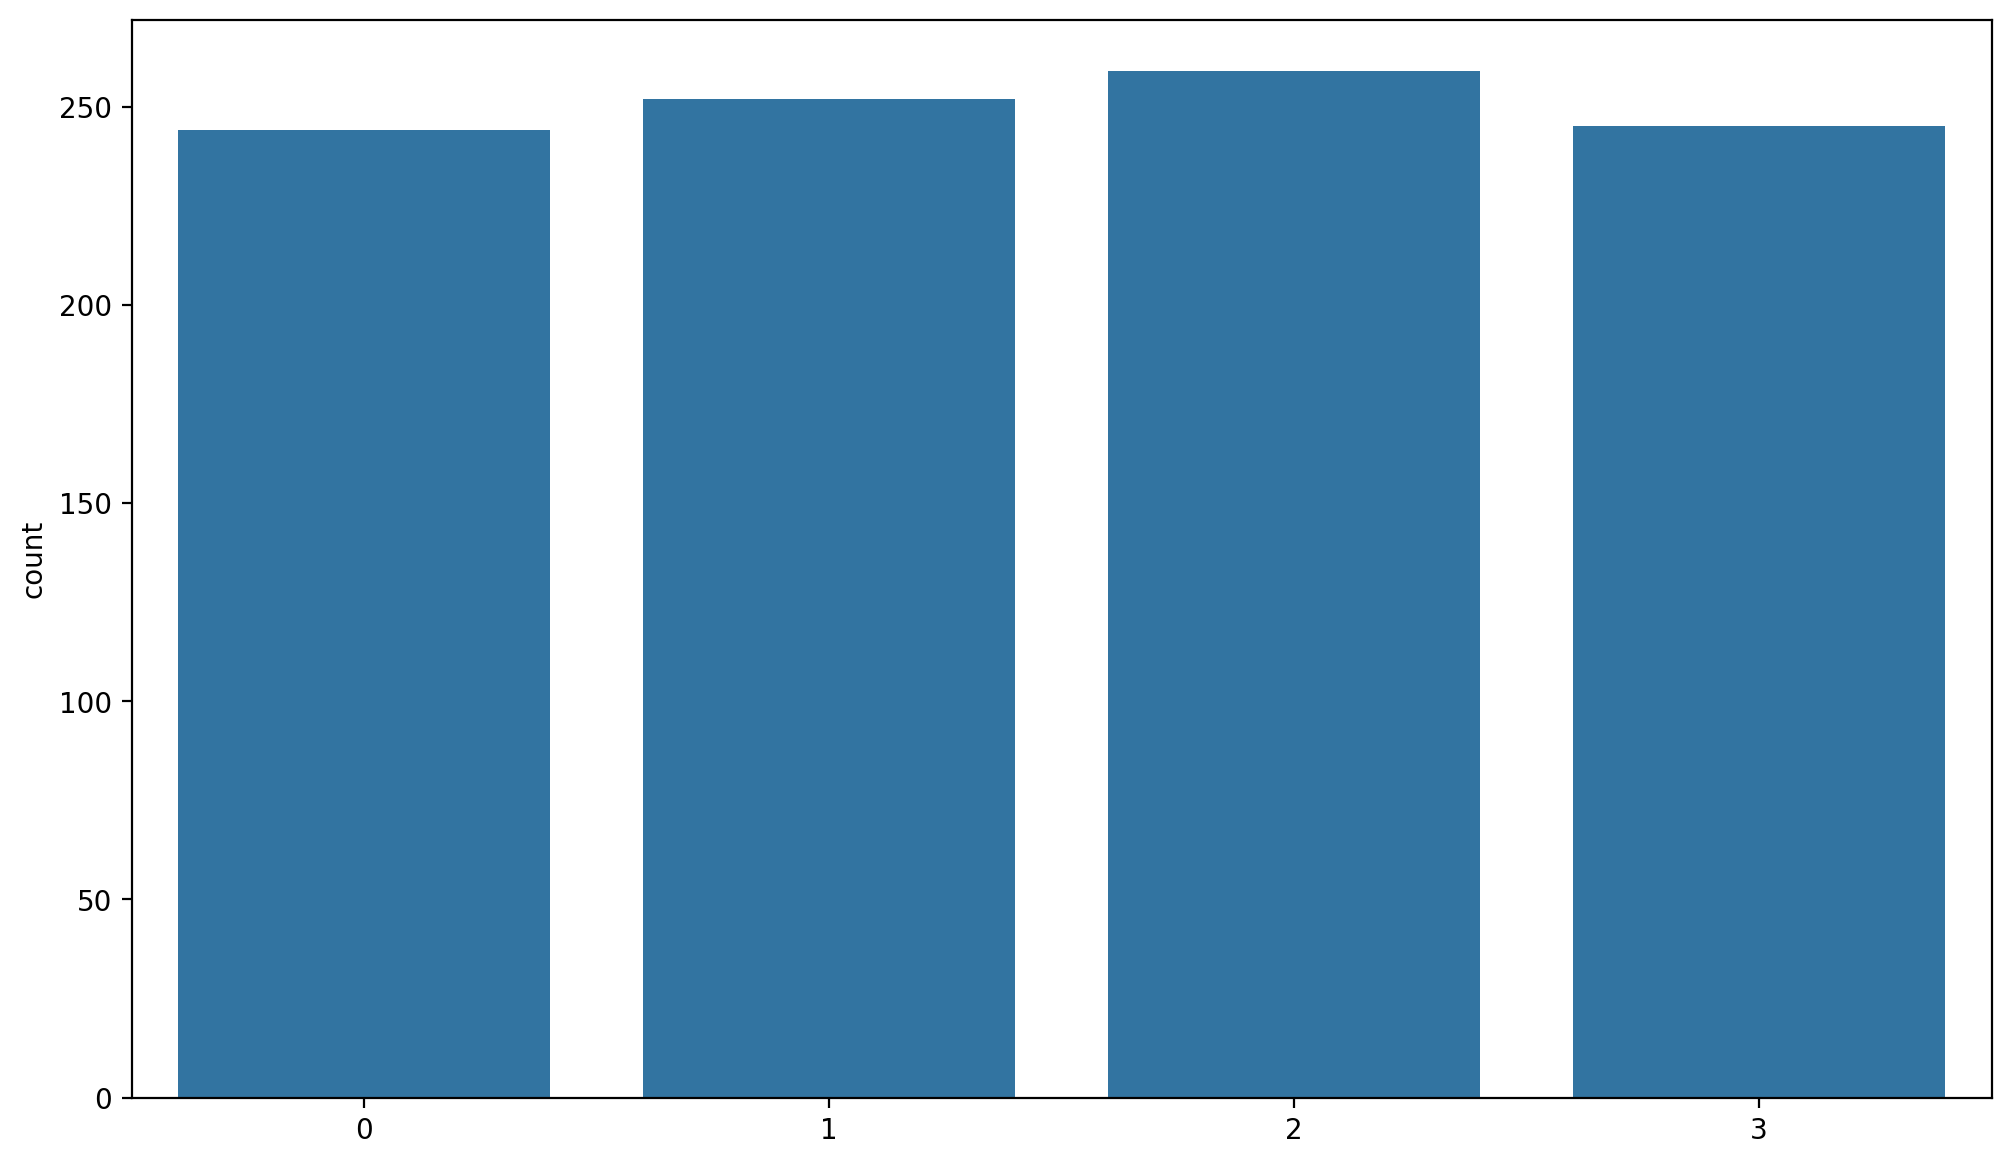

In [7]:
sns.countplot(x = arm_choices)

Calculate mean rewards per arm

In [8]:
for idx, rewards in enumerate(arm_rewards):
    print("Arm ", idx, " mean reward: ", np.mean(rewards))

Arm  0  mean reward:  5.084784710372327
Arm  1  mean reward:  6.984618344905245
Arm  2  mean reward:  3.5099932403147602
Arm  3  mean reward:  1.9432202792403537


Plot evolution of rewards

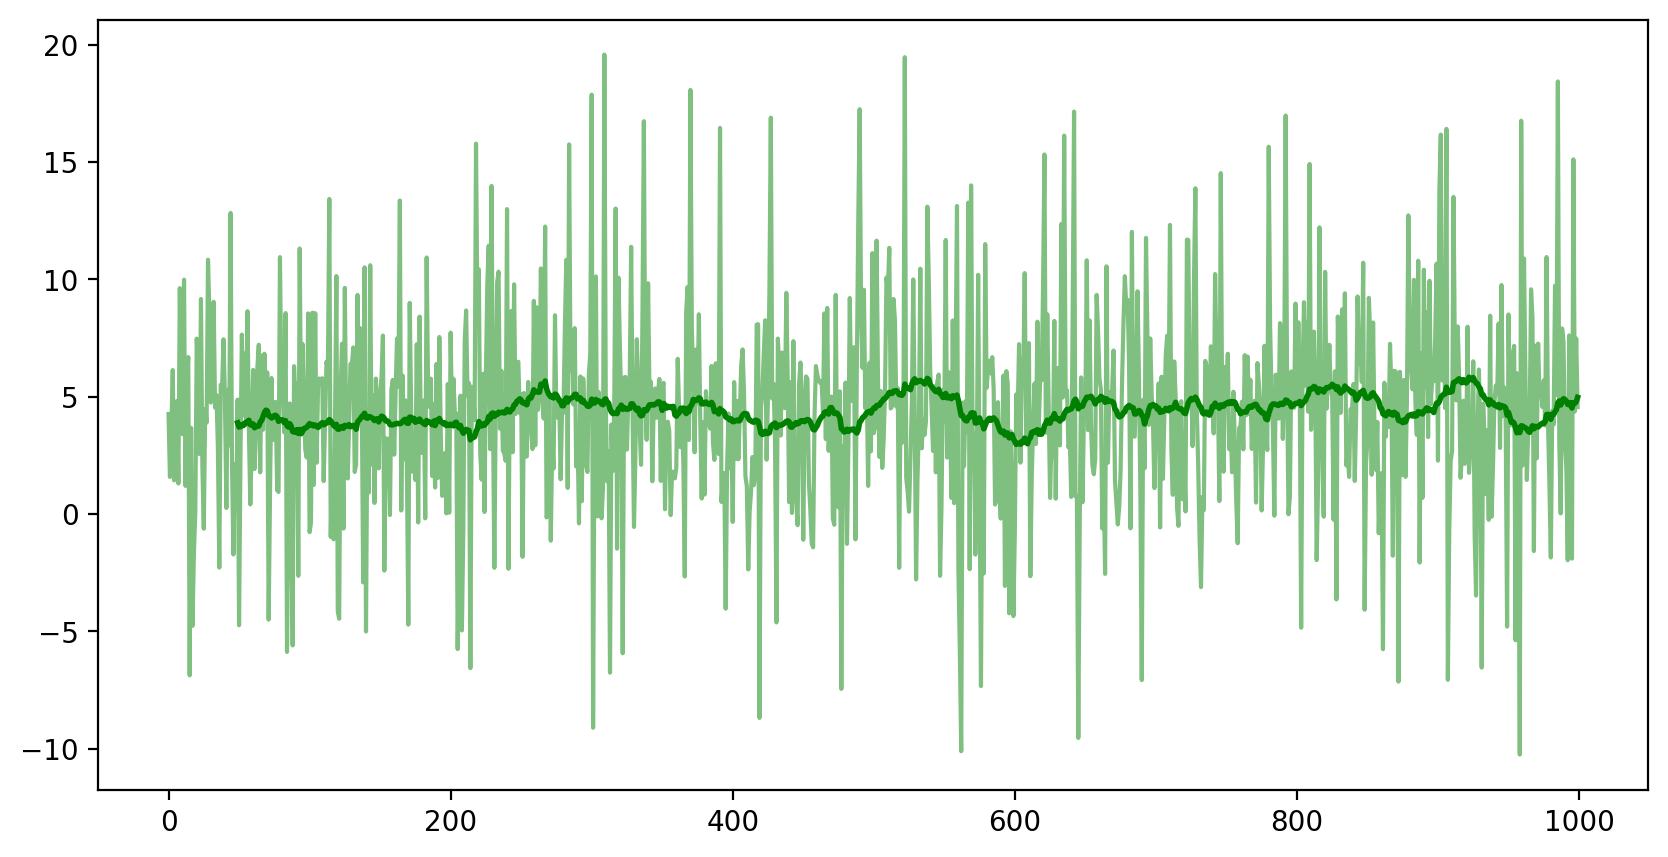

In [9]:
plt.figure(figsize=(10,5))
_ = plt.plot(rewards_random, label = "Random", alpha = 0.5, color = 'green')
_ = plt.plot(pd.Series(rewards_random).rolling(50).mean(), color = 'green', linewidth = 2)
plt.show()

Plot distribution of rewards

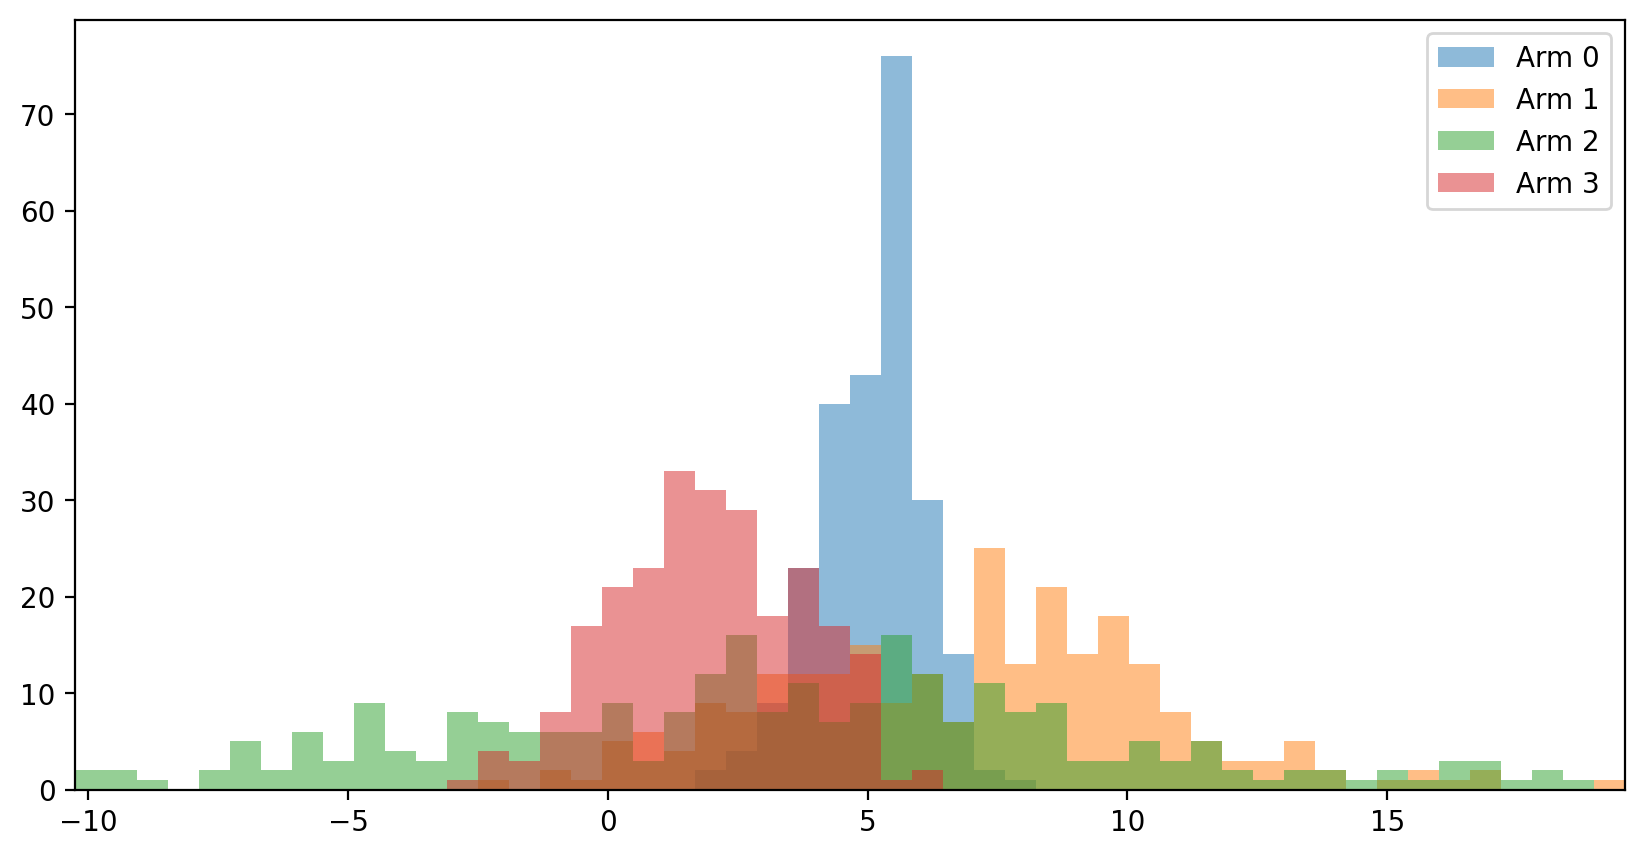

In [10]:
plt.figure(figsize=(10,5))
# Set up some properties to make a nice looking histogram
xlim = (min([reward for sublist in arm_rewards for reward in sublist]), max([reward for sublist in arm_rewards for reward in sublist]))
bins = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0])/50) # fixed bin size
plt.xlim(xlim)

# Draw the histogram for rewards from different arms
for i in range(0, len(arms)):
    _ = plt.hist(arm_rewards[i], bins = bins, label = ("Arm " + str(i)), alpha = 0.5)

# Add a legend
plt.legend()
plt.show()

### Simulate Greedy Strategy

A greedy strategy always selects the arm that has returned the highest average reward so far. Simulate greedy selection of arms for 1000 pulls.

In [ ]:
# Intialise a list to store arm rewards
arm_rewards = list()
for i in range(len(arms)):
    arm_rewards.append(list())
rewards_greedy = list()

# Intialise a list to store arm choices
arm_choices = list()

arm_values = dict()
for i in range(len(arms)):
    arm_values[i] = random.uniform(0, 1)

# set up basic counters
total_reward = 0
arm_choice = 0

num_pulls = 1000

# as long as the user keep splaying ask for an arm choice and generate a reward 
for i in range(1, num_pulls+1):
    
    # Select the arm with the highest value so far
    arm_choice = max(arm_values.keys(), key=(lambda key: arm_values[key])) 
    arm_choices.append(arm_choice)

    # Generate reward and update counters
    reward = np.random.normal(arms[arm_choice][0], arms[arm_choice][1], 1)[0]
    total_reward = total_reward + reward
    rewards_greedy.append(reward)
    arm_rewards[arm_choice].append(reward)
    arm_values[arm_choice] = np.mean(arm_rewards[arm_choice])
    
    print("Arm_chosen: ", arm_choice, " Reward: ", reward, " Total Reward: ", total_reward)

Output with 1000 lines :

Arm_chosen:  2  Reward:  2.0424792151063906  Total Reward:  2.0424792151063906  
Arm_chosen:  2  Reward:  5.437054062308007  Total Reward:  7.479533277414397  
Arm_chosen:  2  Reward:  -4.687788231070096  Total Reward:  2.7917450463443014  
Arm_chosen:  2  Reward:  10.249248028651447  Total Reward:  13.040993074995749  
Arm_chosen:  2  Reward:  11.893301139247145  Total Reward:  24.934294214242893  
Arm_chosen:  2  Reward:  7.84118280663995  Total Reward:  32.775477020882846  

So on...

Plot frequency of choices

<Axes: ylabel='count'>

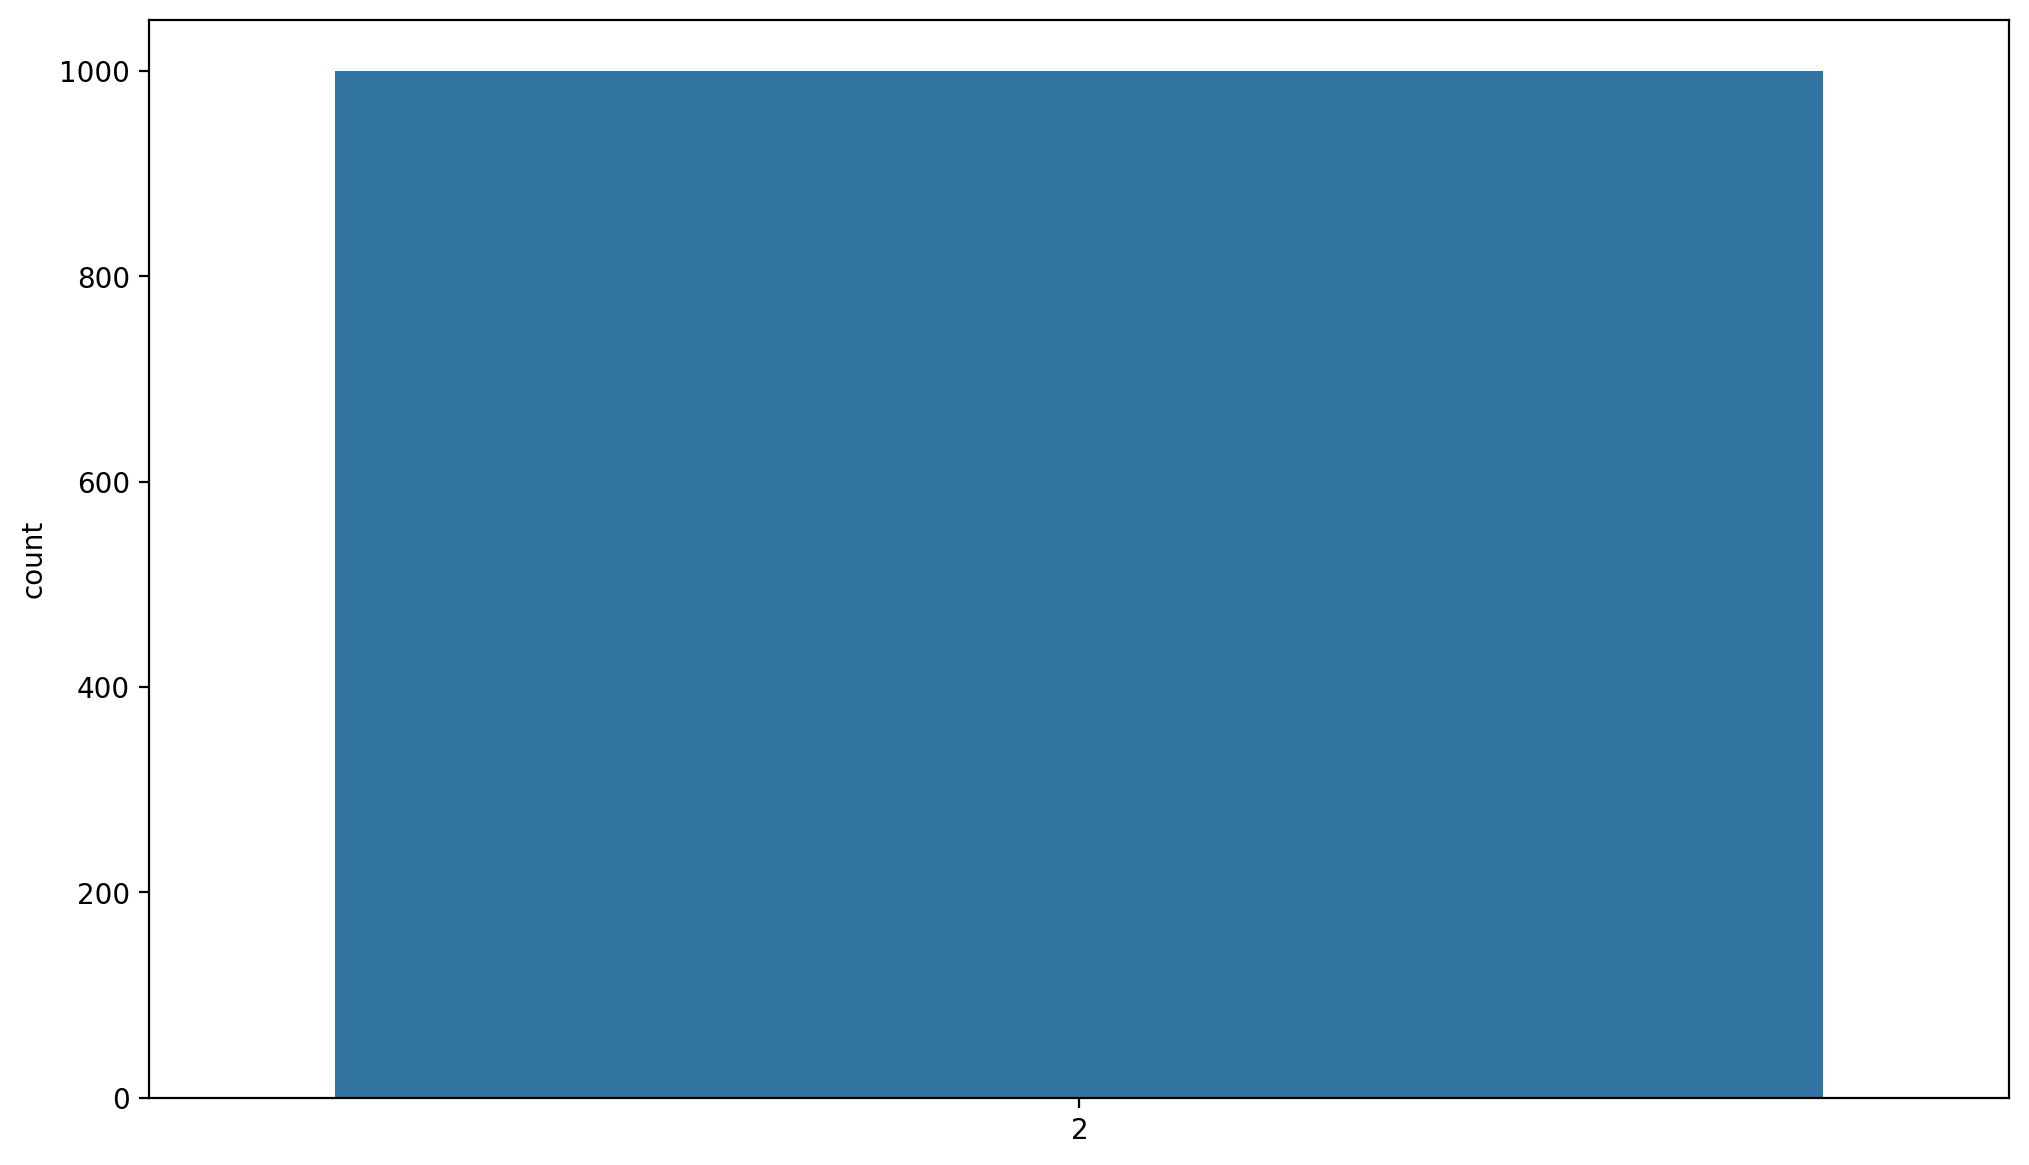

In [12]:
sns.countplot(x = arm_choices)

Calculate mean rewards per arm

In [ ]:
for idx, rewards in enumerate(arm_rewards):
    print("Arm ", idx, " mean reward: ", np.mean(rewards))

Output cleared because it was corrupted.

The output :

Arm  0  mean reward:  nan  
Arm  1  mean reward:  nan  
Arm  2  mean reward:  3.0697064007284114  
Arm  3  mean reward:  nan  

Plot evolution of rewards

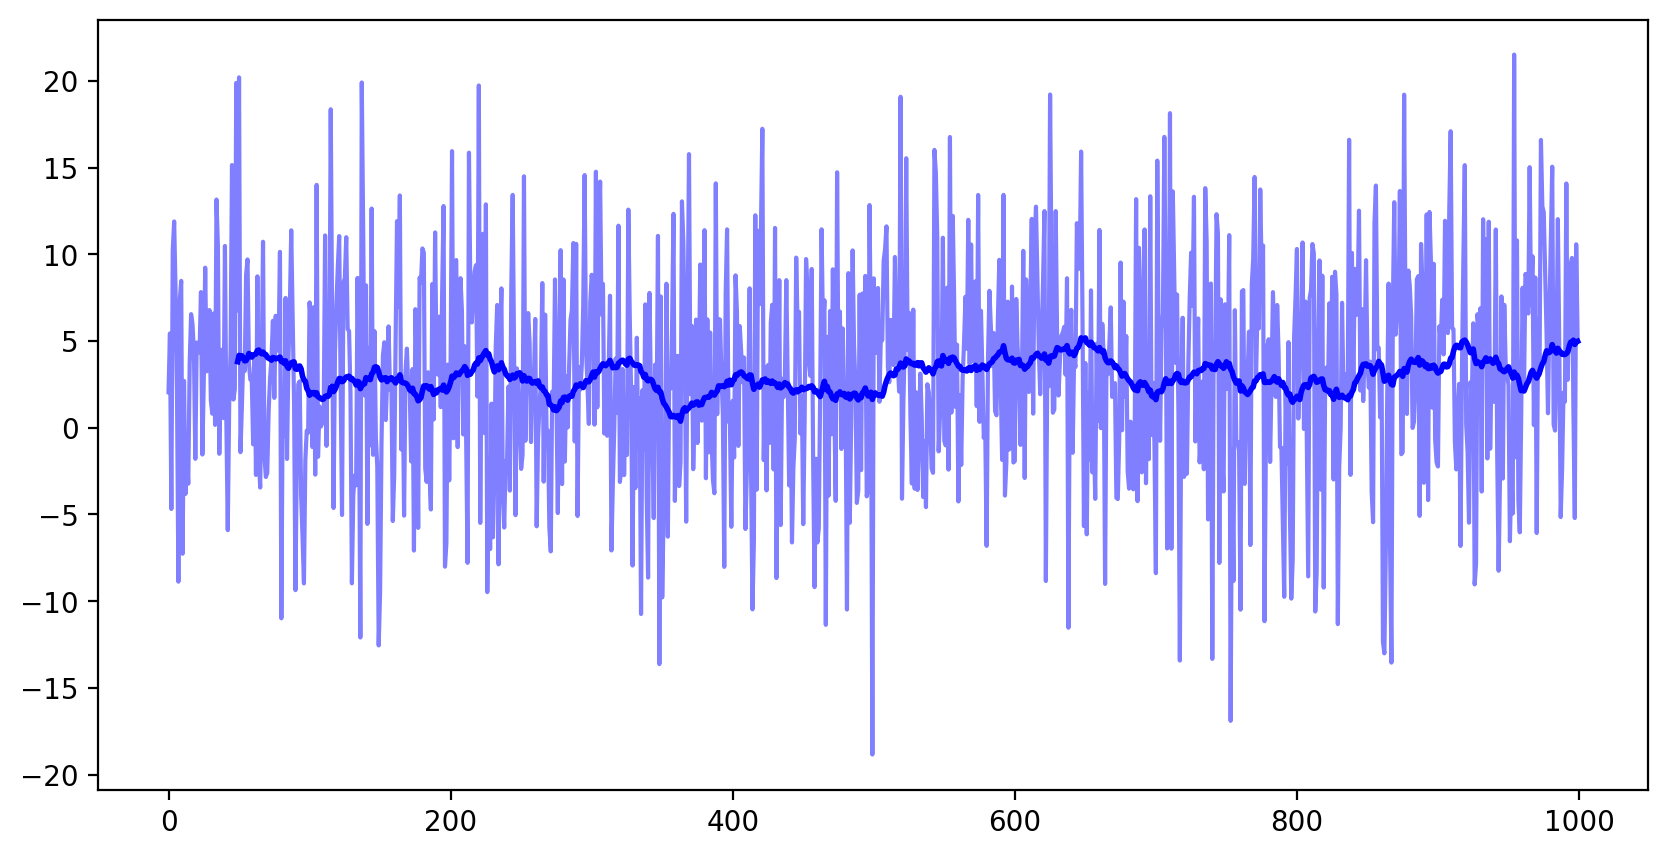

In [14]:
plt.figure(figsize=(10,5))
_ = plt.plot(rewards_greedy, label = "Greedy", alpha = 0.5, color = 'blue')
_ = plt.plot(pd.Series(rewards_greedy).rolling(50).mean(), color = 'blue', linewidth = 2)
plt.show()

Plot distribution of rewards

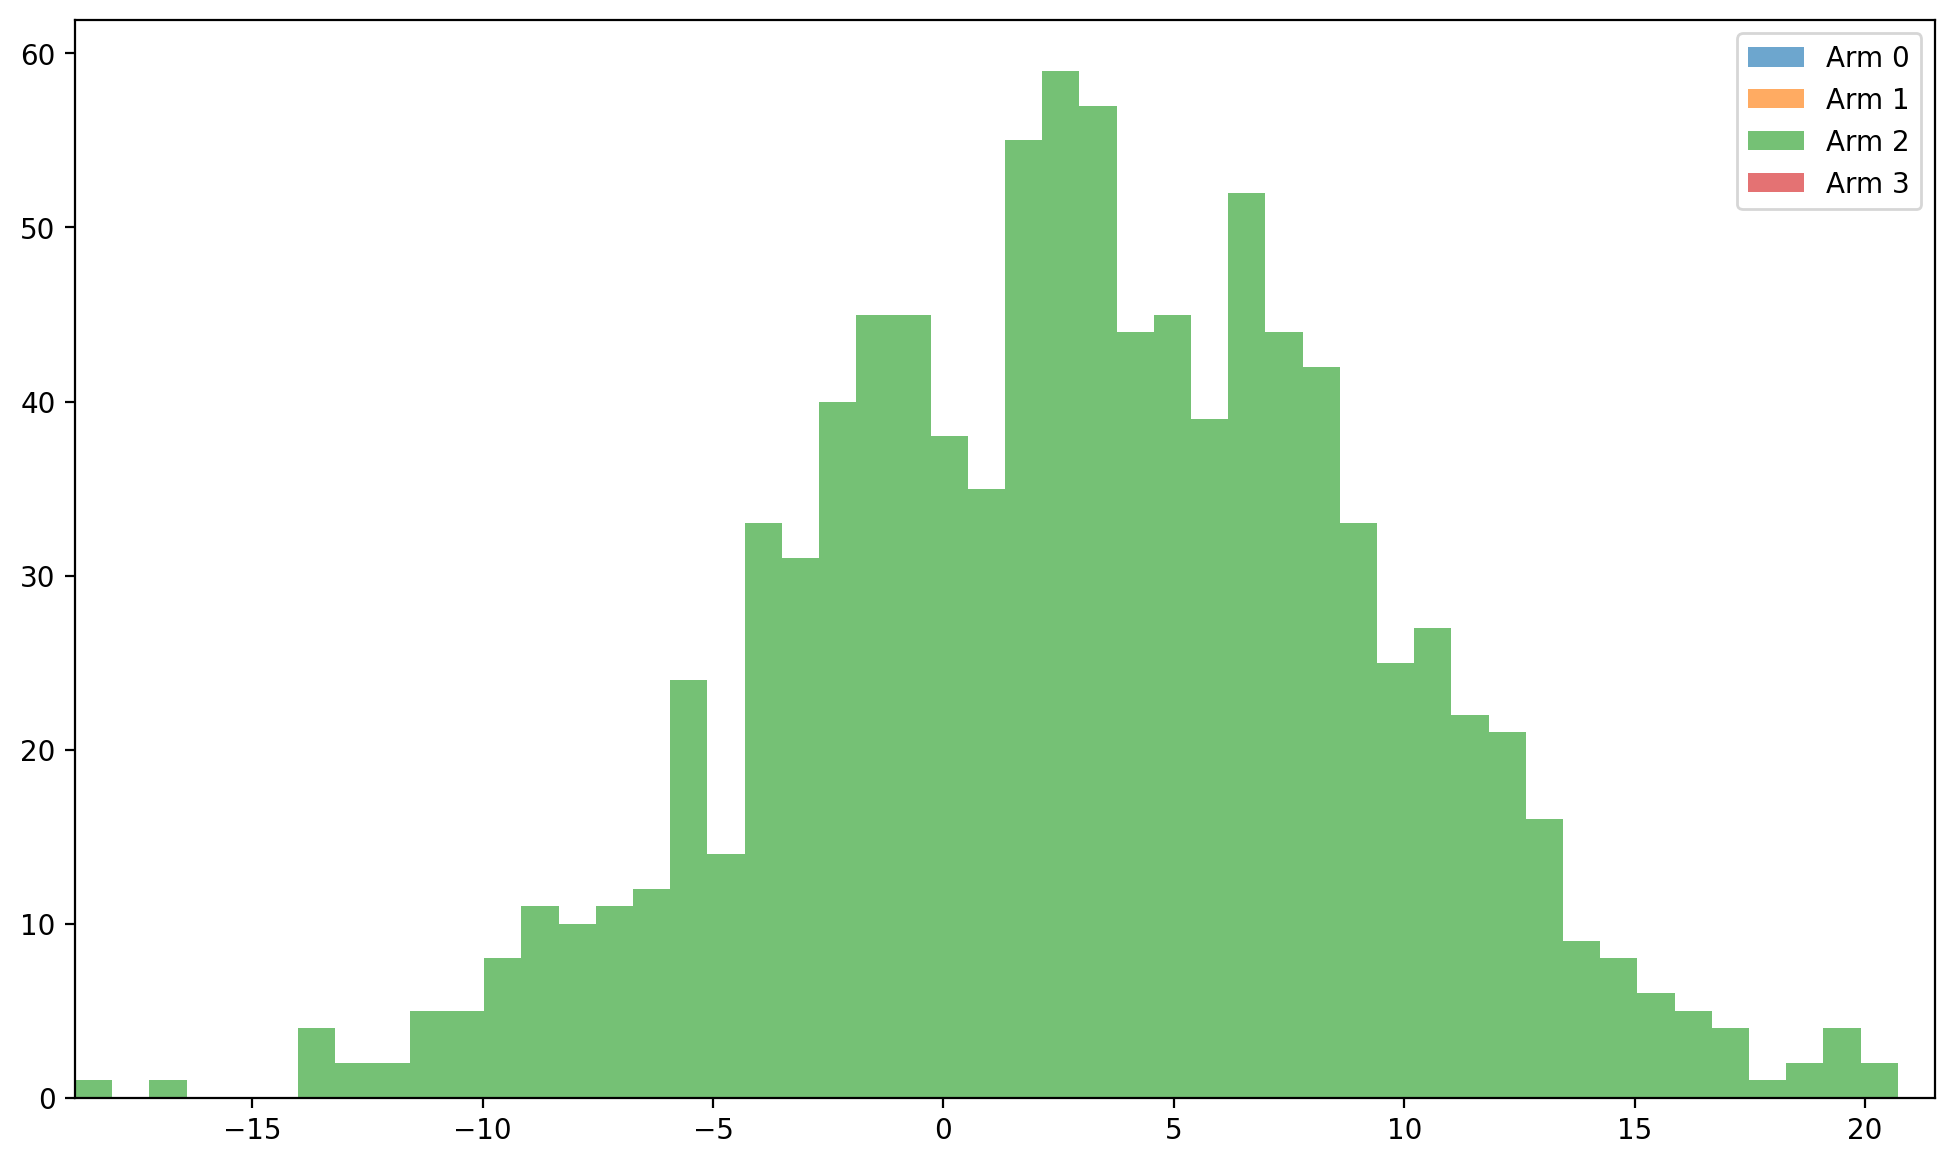

In [15]:
plt.figure()
# Set up some properties to make a nice looking histogram
xlim = (min([reward for sublist in arm_rewards for reward in sublist]), max([reward for sublist in arm_rewards for reward in sublist]))
bins = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0])/50) # fixed bin size
plt.xlim(xlim)

# Draw the histogram for rewards from different arms
for i in range(0, len(arms)):
    _ = plt.hist(arm_rewards[i], bins = bins, label = ("Arm " + str(i)), alpha = 0.65)

# Add a legend
plt.legend()
plt.show()

### Simulate $\epsilon$-Greedy Strategy

An $\epsilon$-greedy stragey uses the greedy strategy most of the time but selects a random arm some fraction ($\epsilon$) of the time. Simulate $\epsilon$-greedy selection of arms for 1000 pulls.

In [ ]:
# Intialise a list to store arm rewards
arm_rewards = list()
for i in range(len(arms)):
    arm_rewards.append(list())
rewards_e_greedy = list()

# Intialise a list to store arm choices
arm_choices = list()

arm_values = dict()
for i in range(len(arms)):
    arm_values[i] = random.uniform(0, 1)

# set up basic counters
total_reward = 0
arm_choice = 0

num_pulls = 1000
epsilon = 0.1

# as long as the user keep splaying ask for an arm choice and generate a reward 
for i in range(1, num_pulls+1):
    
    # Select the arm with the highest value so far or a random value depeidning on epsilon
    if(random.uniform(0, 1) < epsilon):
        arm_choice = random.randint(0, len(arms)-1) 
    else:
        arm_choice = max(arm_values.keys(), key=(lambda key: arm_values[key])) 
    
    arm_choices.append(arm_choice)

    # Generate reward and update counters
    reward = np.random.normal(arms[arm_choice][0], arms[arm_choice][1], 1)[0]
    total_reward = total_reward + reward
    rewards_e_greedy.append(reward)
    arm_rewards[arm_choice].append(reward)
    arm_values[arm_choice] = np.mean(arm_rewards[arm_choice])
    
    print("Arm_chosen: ", arm_choice, " Reward: ", reward, " Total Reward: ", total_reward)

Output with 1000 lines :

Arm_chosen:  3  Reward:  4.946822135117706  Total Reward:  4.946822135117706  
Arm_chosen:  3  Reward:  4.936339596619147  Total Reward:  9.883161731736854  
Arm_chosen:  3  Reward:  2.014467007853065  Total Reward:  11.89762873958992  
Arm_chosen:  3  Reward:  1.4141472407354527  Total Reward:  13.311775980325372  
Arm_chosen:  3  Reward:  -0.6216431449640218  Total Reward:  12.69013283536135  
Arm_chosen:  0  Reward:  4.37886985018933  Total Reward:  17.06900268555068  

So on...

Plot frequency of choices

<Axes: ylabel='count'>

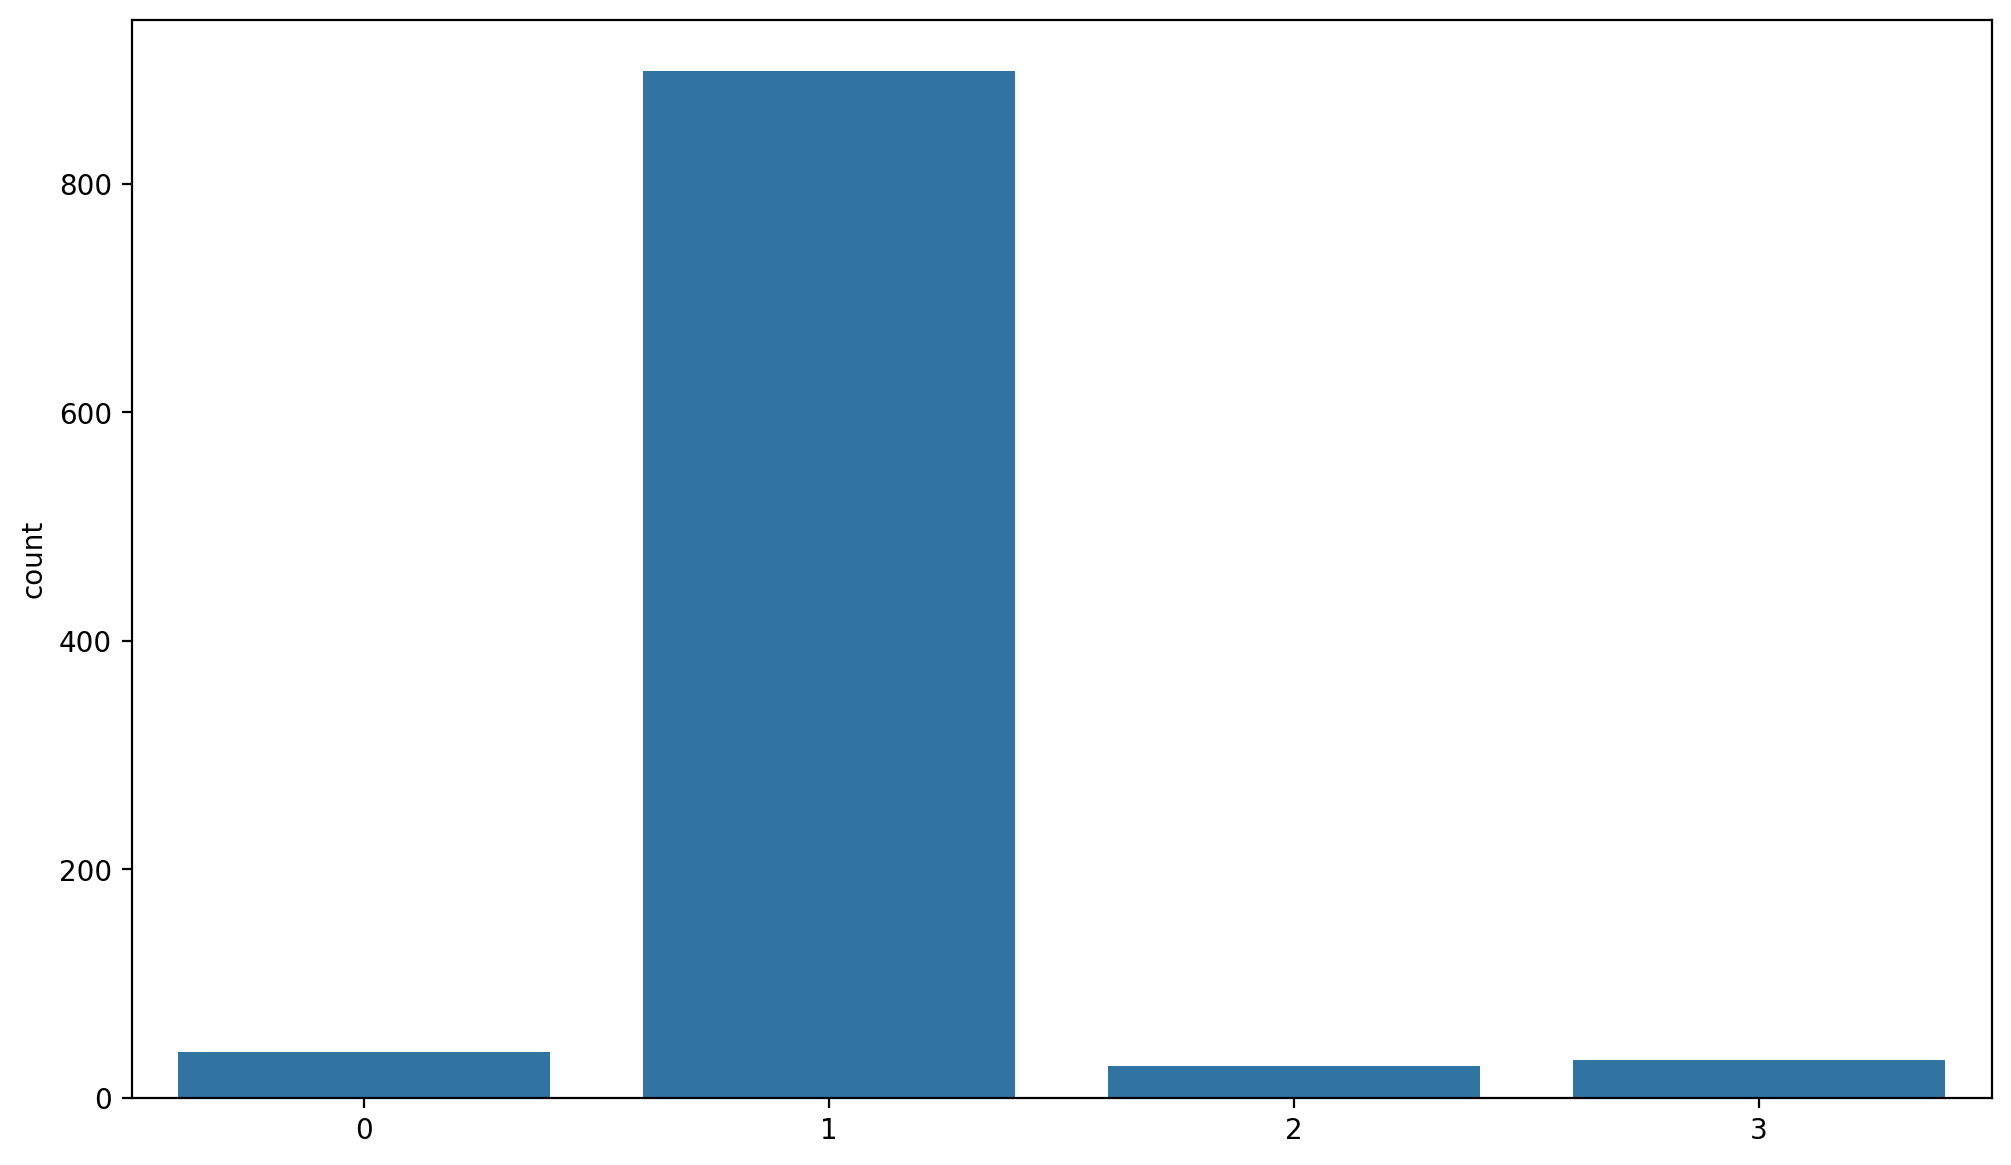

In [17]:
sns.countplot(x = arm_choices)

Calculate mean rewards per arm

In [18]:
for idx, rewards in enumerate(arm_rewards):
    print("Arm ", idx, " mean reward: ", np.mean(rewards))

Arm  0  mean reward:  4.985870894267587
Arm  1  mean reward:  7.040890540164282
Arm  2  mean reward:  2.3661178243299914
Arm  3  mean reward:  2.253701329933639


Plot evolution of rewards

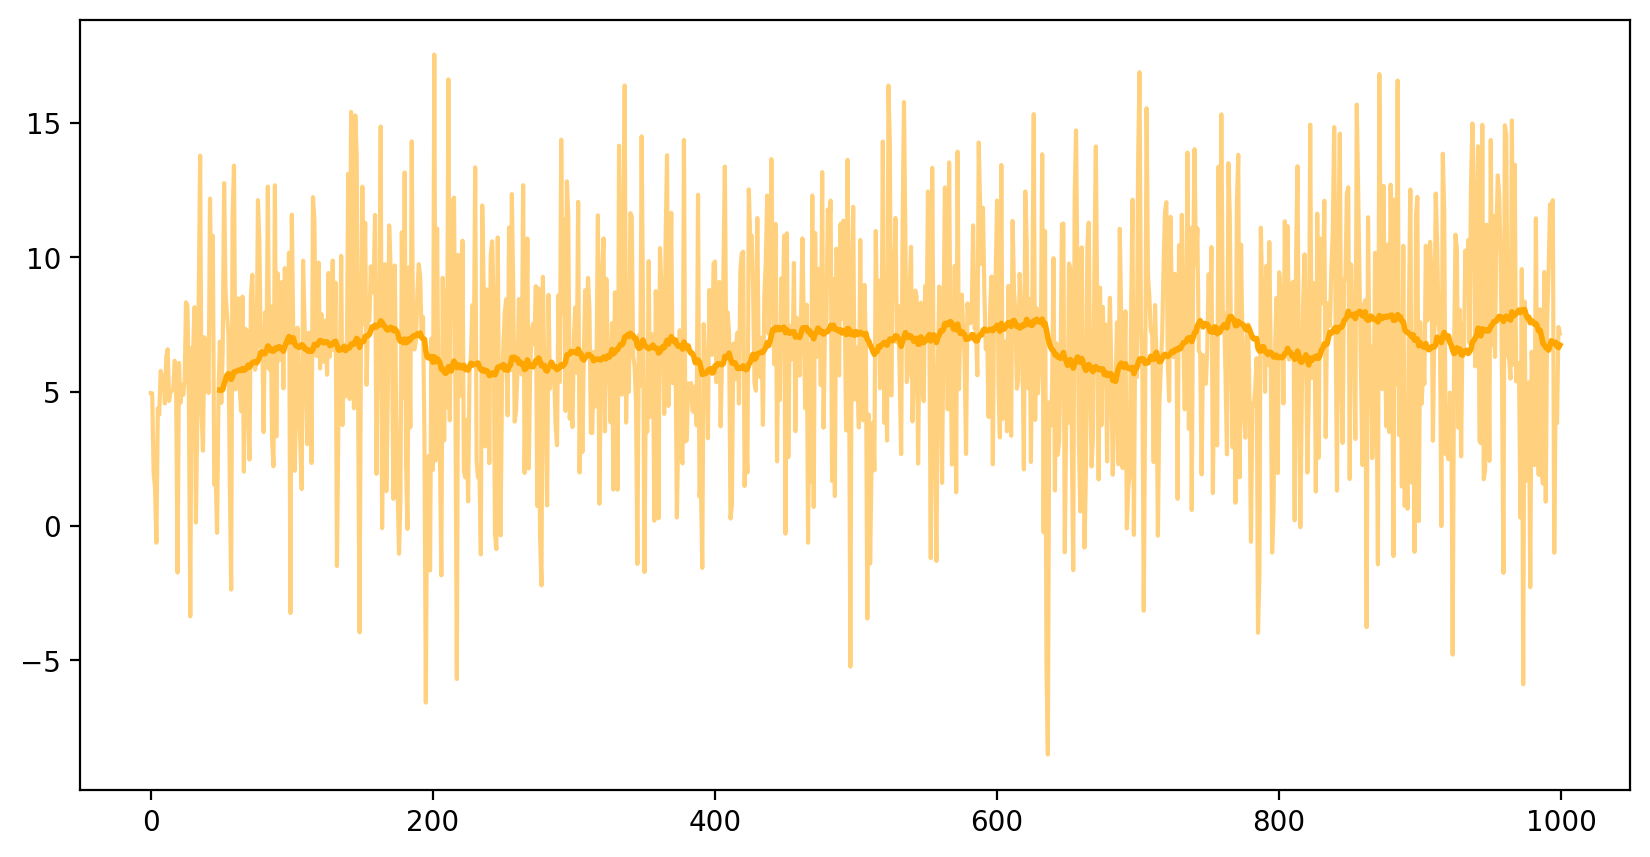

In [19]:
plt.figure(figsize=(10,5))
_ = plt.plot(rewards_e_greedy, label =  "e-Greedy", alpha = 0.5, color = 'orange')
_ = plt.plot(pd.Series(rewards_e_greedy).rolling(50).mean(), color = 'orange', linewidth = 2)
plt.show()

Plot distribution of rewards

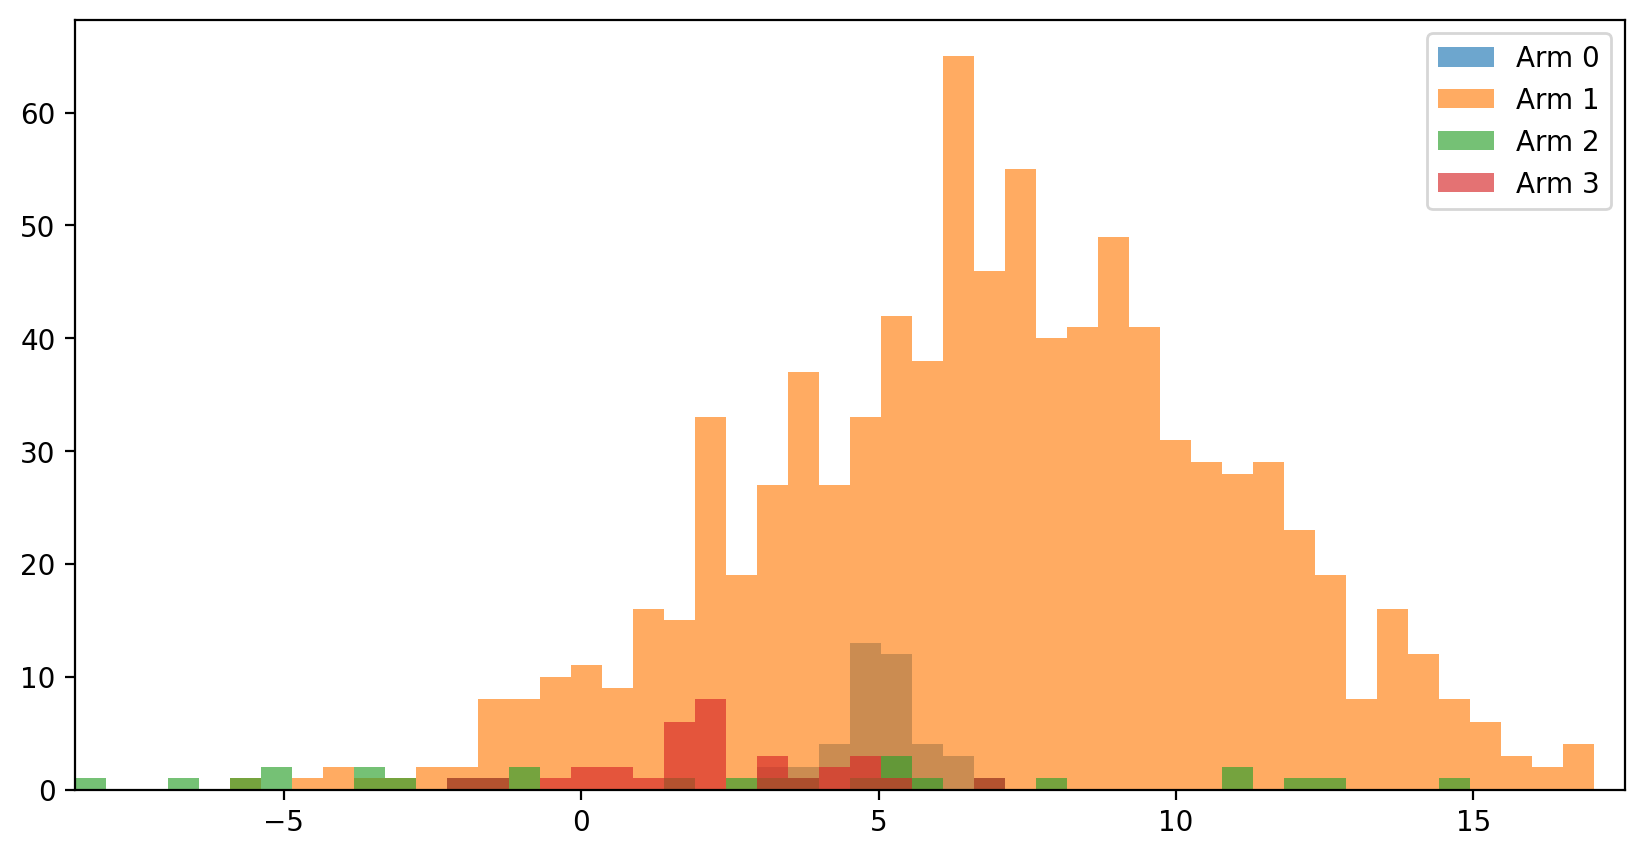

In [20]:
plt.figure(figsize=(10,5))
# Set up some properties to make a nice looking histogram
xlim = (min([reward for sublist in arm_rewards for reward in sublist]), max([reward for sublist in arm_rewards for reward in sublist]))
bins = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0])/50) # fixed bin size
plt.xlim(xlim)

# Draw the histogram for rewards from different arms
for i in range(0, len(arms)):
    _ = plt.hist(arm_rewards[i], bins = bins, label = ("Arm " + str(i)), alpha = 0.65)

# Add a legend
plt.legend()
plt.show()

### Simulate a $\epsilon$-First Policy
An 𝜀-first policy uses a random policy for the first N trials and then a greedy policy after that. Implement this policy with an experiment that simulates 1000 pulls like the other experiments

In [ ]:
# Add code here

# Initialize lists to store rewards and choices
arm_rewards = [[] for _ in range(len(arms))]
rewards_e_first = []
arm_choices = []

# Initialize arm value estimates
arm_values = {i: random.uniform(0, 1) for i in range(len(arms))}

# Set up counters
total_reward = 0
num_pulls = 1000
epsilon = 0.1  # fraction of pulls used for exploration
exploration_pulls = int(epsilon * num_pulls)

# Simulation loop
for i in range(1, num_pulls + 1):

    # Phase 1: random exploration
    if i <= exploration_pulls:
        arm_choice = random.randint(0, len(arms) - 1)
    
    # Phase 2: greedy exploitation
    else:
        arm_choice = max(arm_values.keys(), key=lambda key: arm_values[key])
    
    arm_choices.append(arm_choice)

    # Generate reward and update stats
    reward = np.random.normal(arms[arm_choice][0], arms[arm_choice][1], 1)[0]
    total_reward += reward
    rewards_e_first.append(reward)
    arm_rewards[arm_choice].append(reward)

    # Update mean reward for the selected arm
    arm_values[arm_choice] = np.mean(arm_rewards[arm_choice])

    print(f"Arm_chosen: {arm_choice}  Reward: {reward:.3f}  Total Reward: {total_reward:.3f}")

Output with 1000 lines :

Arm_chosen: 3  Reward: 2.587  Total Reward: 2.587  
Arm_chosen: 2  Reward: 0.426  Total Reward: 3.013  
Arm_chosen: 3  Reward: 0.883  Total Reward: 3.896  
Arm_chosen: 3  Reward: -1.359  Total Reward: 2.536  
Arm_chosen: 2  Reward: 16.937  Total Reward: 19.473  
Arm_chosen: 0  Reward: 5.809  Total Reward: 25.282  

So on...

<Axes: ylabel='count'>

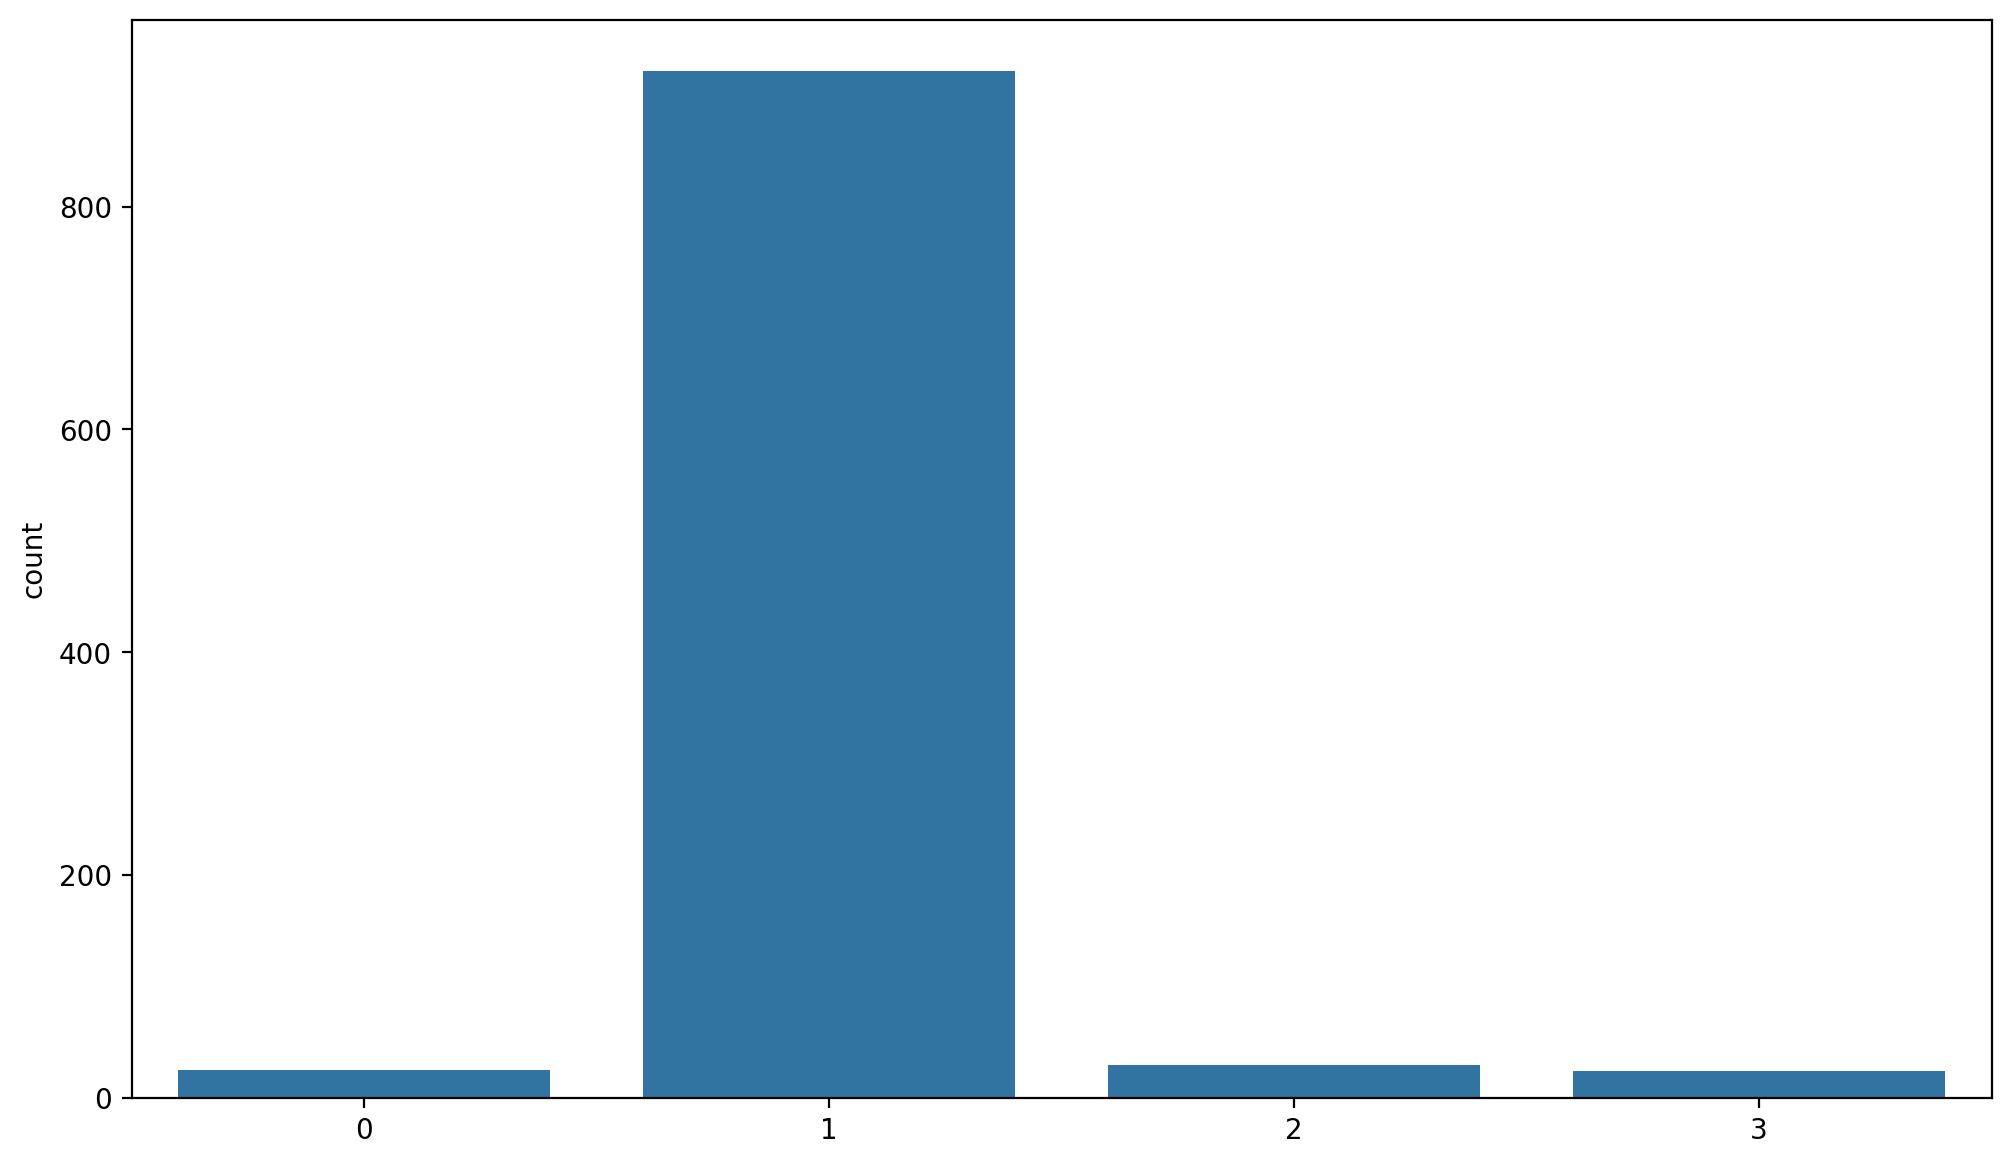

In [22]:
sns.countplot(x = arm_choices)

Calculate mean rewards per arm

In [23]:
for idx, rewards in enumerate(arm_rewards):
    print("Arm ", idx, " mean reward: ", np.mean(rewards))

Arm  0  mean reward:  5.227620757585944
Arm  1  mean reward:  6.887771592902114
Arm  2  mean reward:  4.853803834369687
Arm  3  mean reward:  1.8080316949530764


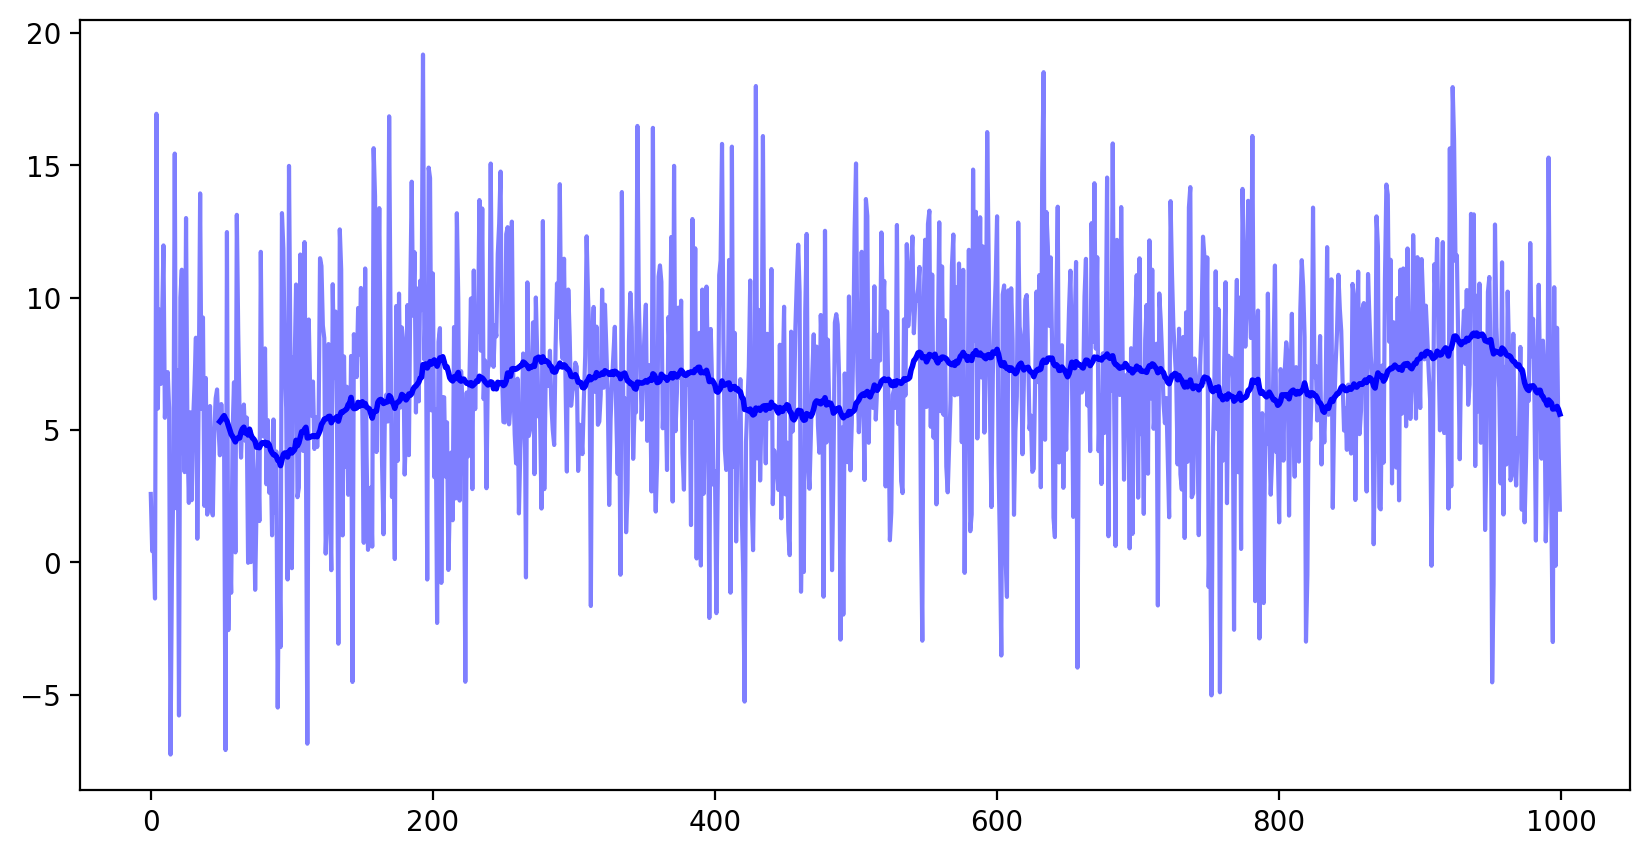

In [26]:
plt.figure(figsize=(10,5))
_ = plt.plot(rewards_e_first, label =  "e-First", alpha = 0.5, color = 'blue')
_ = plt.plot(pd.Series(rewards_e_first).rolling(50).mean(), color = 'blue', linewidth = 2)
plt.show()

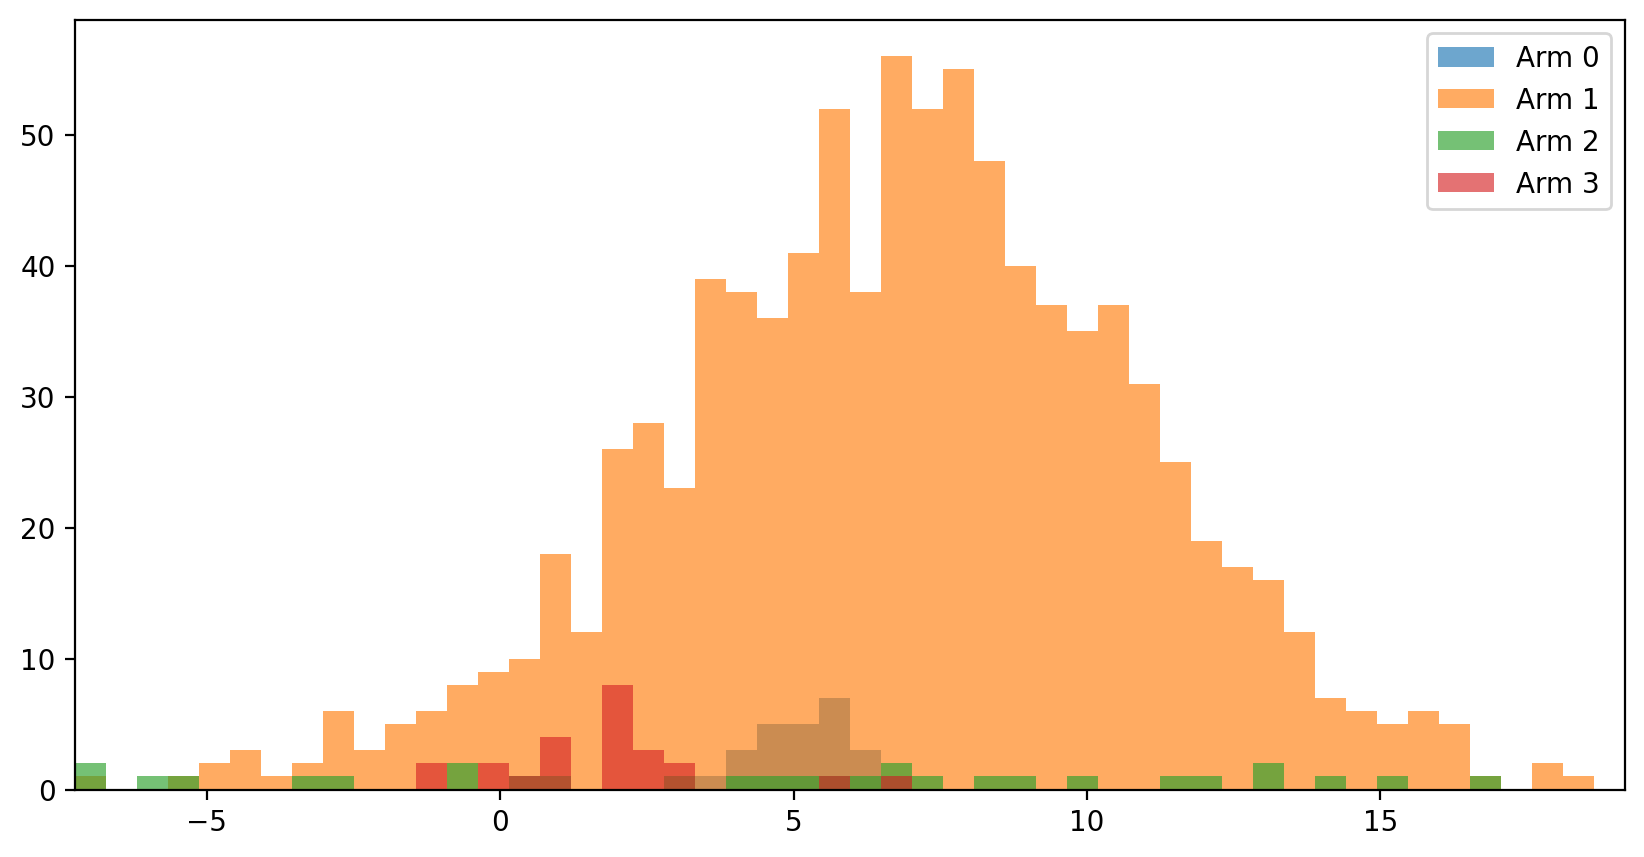

In [27]:
plt.figure(figsize=(10,5))
# Set up some properties to make a nice looking histogram
xlim = (min([reward for sublist in arm_rewards for reward in sublist]), max([reward for sublist in arm_rewards for reward in sublist]))
bins = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0])/50) # fixed bin size
plt.xlim(xlim)

# Draw the histogram for rewards from different arms
for i in range(0, len(arms)):
    _ = plt.hist(arm_rewards[i], bins = bins, label = ("Arm " + str(i)), alpha = 0.65)

# Add a legend
plt.legend()
plt.show()

### Simulate a $\epsilon$-Decreasing Policy
An 𝜀-decreasing policy basically uses an 𝜀-greedy strategy except the value of 𝜀 decreases over time. Implement this policy with an experiment that simulates 1000 pulls like the other experiments.

In [ ]:
# Add code here

# Initialize lists to store rewards and choices
arm_rewards = [[] for _ in range(len(arms))]
rewards_e_decreasing = []
arm_choices = []

# Initialize arm value estimates
arm_values = {i: random.uniform(0, 1) for i in range(len(arms))}

# Set up counters
total_reward = 0
num_pulls = 1000

# Simulation loop
for i in range(1, num_pulls + 1):
    
    # Decrease epsilon over time
    epsilon = 1 / i   # exploration decreases as i increases
    
    # With probability ε, pick random arm; else pick greedy arm
    if random.uniform(0, 1) < epsilon:
        arm_choice = random.randint(0, len(arms) - 1)
    else:
        arm_choice = max(arm_values.keys(), key=lambda key: arm_values[key])
    
    arm_choices.append(arm_choice)
    
    # Generate reward and update stats
    reward = np.random.normal(arms[arm_choice][0], arms[arm_choice][1], 1)[0]
    total_reward += reward
    rewards_e_decreasing.append(reward)
    arm_rewards[arm_choice].append(reward)
    
    # Update average reward for the chosen arm
    arm_values[arm_choice] = np.mean(arm_rewards[arm_choice])
    
    print(f"Arm_chosen: {arm_choice}  Reward: {reward:.3f}  Total Reward: {total_reward:.3f}")

Output with 1000 lines :

Arm_chosen: 0  Reward: 5.344  Total Reward: 5.344  
Arm_chosen: 3  Reward: 2.483  Total Reward: 7.827  
Arm_chosen: 1  Reward: -1.407  Total Reward: 6.420  
Arm_chosen: 0  Reward: 6.564  Total Reward: 12.984  
Arm_chosen: 0  Reward: 3.825  Total Reward: 16.809  
Arm_chosen: 0  Reward: 4.538  Total Reward: 21.348  

So on...

<Axes: ylabel='count'>

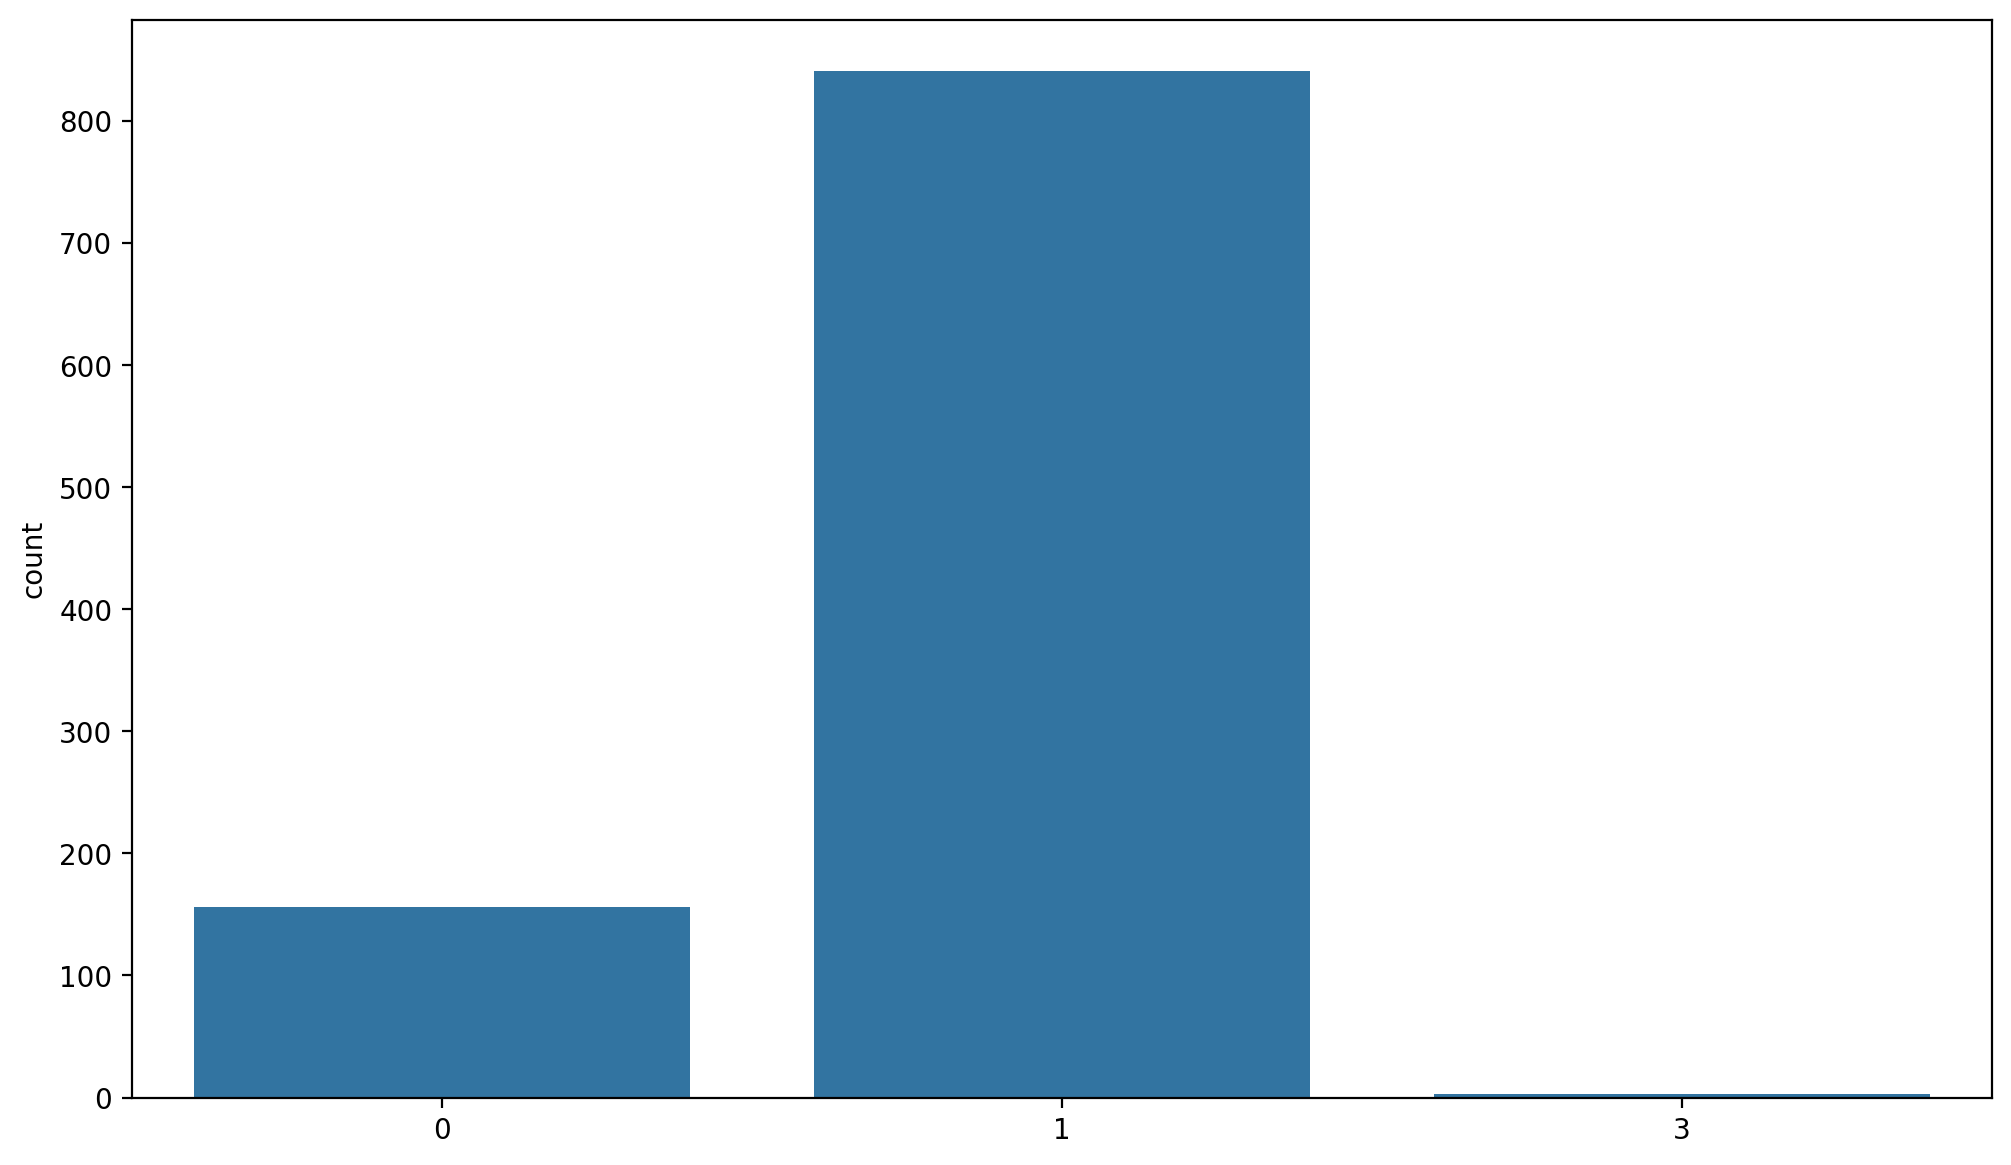

In [31]:
sns.countplot(x = arm_choices)

Calculate mean rewards per arm

In [ ]:
for idx, rewards in enumerate(arm_rewards):
    print("Arm ", idx, " mean reward: ", np.mean(rewards))

Output cleared because it was corrupted.

The output :

Arm  0  mean reward:  4.889317797808597  
Arm  1  mean reward:  7.123342305273245  
Arm  2  mean reward:  nan  
Arm  3  mean reward:  0.7094133389093784  

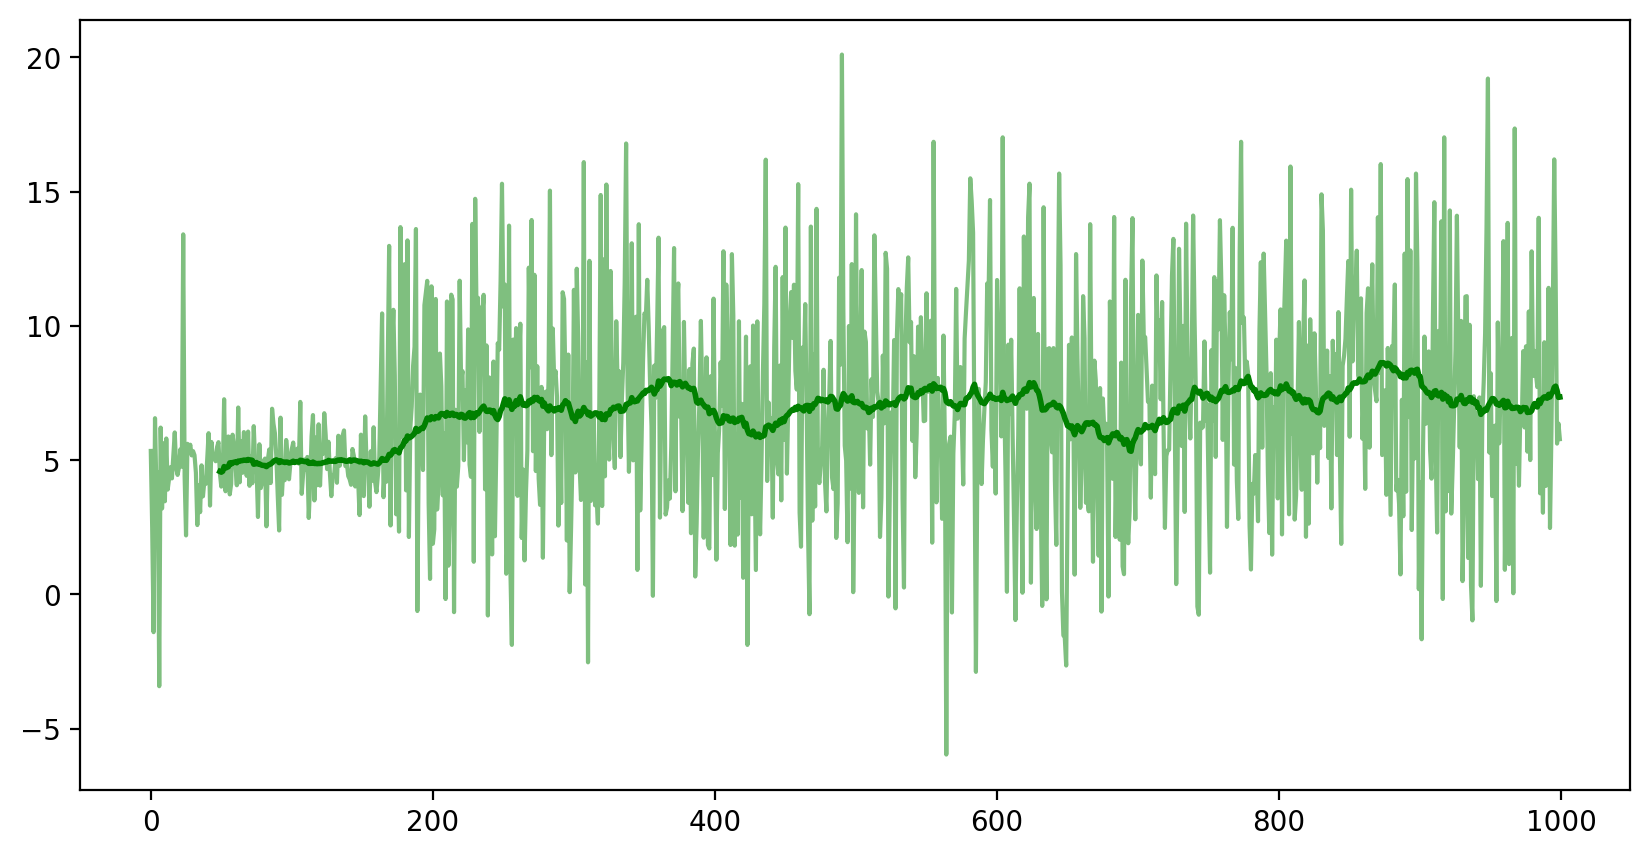

In [33]:
plt.figure(figsize=(10,5))
_ = plt.plot(rewards_e_decreasing, label =  "e-Decreasing", alpha = 0.5, color = 'green')
_ = plt.plot(pd.Series(rewards_e_decreasing).rolling(50).mean(), color = 'green', linewidth = 2)
plt.show()

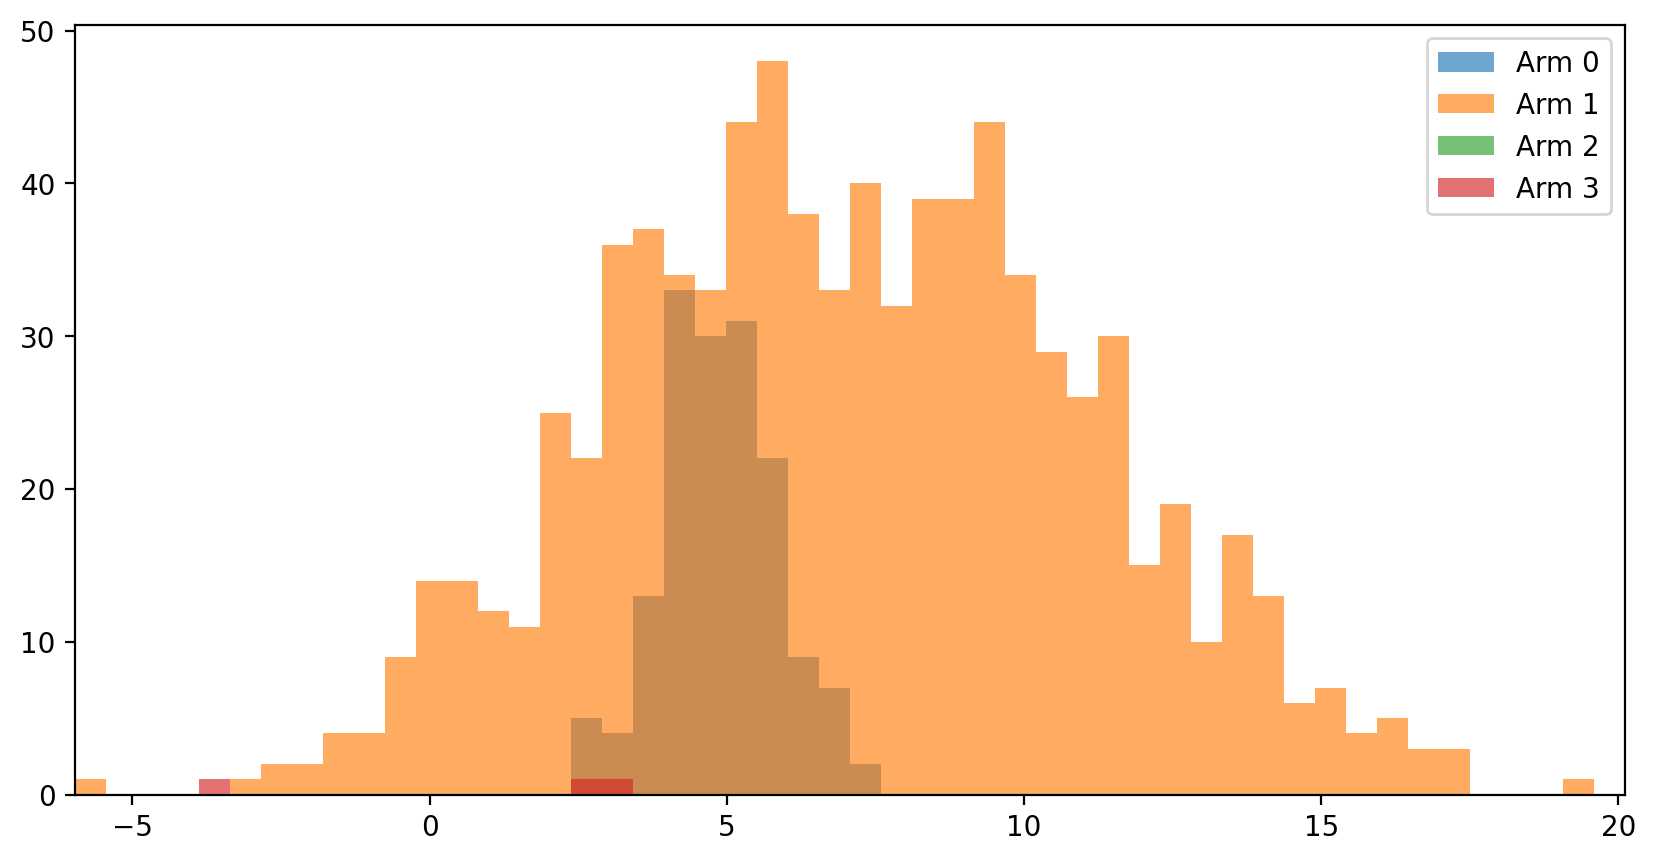

In [34]:
plt.figure(figsize=(10,5))
# Set up some properties to make a nice looking histogram
xlim = (min([reward for sublist in arm_rewards for reward in sublist]), max([reward for sublist in arm_rewards for reward in sublist]))
bins = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0])/50) # fixed bin size
plt.xlim(xlim)

# Draw the histogram for rewards from different arms
for i in range(0, len(arms)):
    _ = plt.hist(arm_rewards[i], bins = bins, label = ("Arm " + str(i)), alpha = 0.65)

# Add a legend
plt.legend()
plt.show()

### Compare Strategies
Compare the performance of the different strategies. Add the results of 

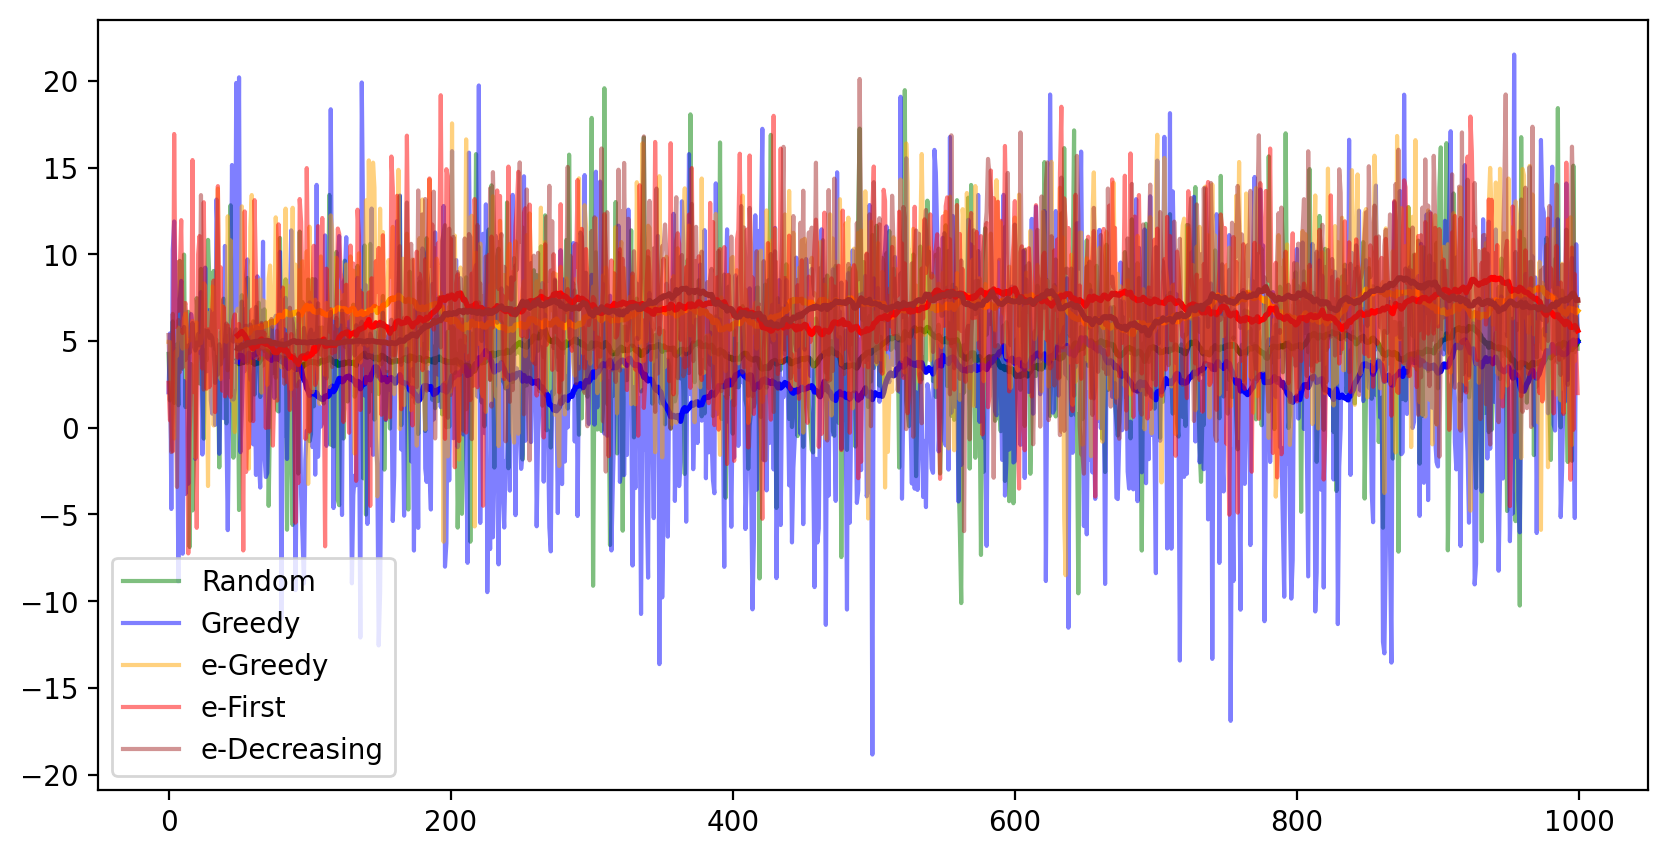

In [35]:
plt.figure(figsize=(10,5))

_ = plt.plot(rewards_random, label = "Random", alpha = 0.5, color = 'green')
_ = plt.plot(pd.Series(rewards_random).rolling(50).mean(), color = 'green', linewidth = 2)
_ = plt.plot(rewards_greedy, label = "Greedy", alpha = 0.5, color = 'blue')
_ = plt.plot(pd.Series(rewards_greedy).rolling(50).mean(), color = 'blue', linewidth = 2)
_ = plt.plot(rewards_e_greedy, label =  "e-Greedy", alpha = 0.5, color = 'orange')
_ = plt.plot(pd.Series(rewards_e_greedy).rolling(50).mean(), color = 'orange', linewidth = 2)

# Add code here

_ = plt.plot(rewards_e_first, label =  "e-First", alpha = 0.5, color = 'red')
_ = plt.plot(pd.Series(rewards_e_first).rolling(50).mean(), color = 'red', linewidth = 2)

_ = plt.plot(rewards_e_decreasing, label =  "e-Decreasing", alpha = 0.5, color = 'brown')
_ = plt.plot(pd.Series(rewards_e_decreasing).rolling(50).mean(), color = 'brown', linewidth = 2)

plt.legend()
plt.show()